In [27]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [28]:
load_dotenv()

True

In [29]:
llm=ChatOpenAI(model="gpt-4.1-mini")


In [30]:
class llm_state(TypedDict):
    question:str
    answer:str

In [31]:
def ans_this_ques(state:llm_state) -> llm_state:

    ques=state['question']

    prompt = f"Answer the given question{ques}"

    ans=llm.invoke(prompt).content

    state['answer']=ans

    return state

In [32]:
graph=StateGraph(llm_state)

In [33]:
graph.add_node('give_ans_node',ans_this_ques)

In [34]:
graph.add_edge(START,'give_ans_node')
graph.add_edge('give_ans_node',END)

In [35]:
simple_llm_workflow=graph.compile()

In [37]:
initial_state={'question':'Tell me the name of all 8 planets in our solar system'}

final_state=simple_llm_workflow.invoke(initial_state)

print(final_state)

{'question': 'Tell me the name of all 8 planets in our solar system', 'answer': 'The eight planets in our solar system are:\n\n1. Mercury  \n2. Venus  \n3. Earth  \n4. Mars  \n5. Jupiter  \n6. Saturn  \n7. Uranus  \n8. Neptune'}


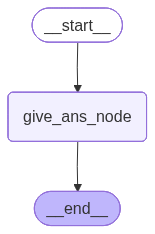

In [38]:
from IPython.display import Image
Image(simple_llm_workflow.get_graph().draw_mermaid_png())